- 통계 출처 : https://kcc.go.kr/user.do?mode=view&page=A02060400&dc=K02060400&boardId=1030&cp=1&searchKey=TITLE&searchVal=%EC%82%AC%EC%9D%B4%EB%B2%84&boardSeq=53091
- 데이터셋 출처 : https://kosis.kr/statHtml/statHtml.do?orgId=164&tblId=DT_164003_A003&vw_cd=MT_ZTITLE&list_id=C_001_001&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
%matplotlib inline
experience_teen = pd.read_csv("./violence_analysis/사이버폭력_피해_경로_청소년.csv", encoding="cp949")
react_teen = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_후_취한_행동_청소년.csv", encoding="cp949")
react_adult = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_후_취한_행동_성인.csv",encoding="cp949")
reason_teen = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_후_무대응_이유_청소년.csv",encoding="cp949")
reason_adult = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_후_무대응_이유_성인.csv",encoding="cp949")
category_teen = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_청소년.csv",encoding="cp949")
category_adult = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_성인.csv",encoding="cp949")
newcategory_teen = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_2022_청소년.csv",encoding="cp949")
newcategory_adult = pd.read_csv("./violence_analysis/사이버폭력_피해_경험_2022_성인.csv",encoding="cp949")

# 피해자의 입장에서
- 사이버 폭력 피해경로 - 온라인 게임이 가장 높음
- 사이버 폭력 피해 경험 후 취한 행동 - 가해자를 차단 or 내아이디 삭제 및 변경, 무대응 등 소극적 행동 70% 이상
- 사이버 폭력 피해 경험 후 무대응 이유 - 별일이 아니라고 생각, 가해자를 몰라서, 도움을 요청할 곳을 몰라서 순
##### 만약 사이버 언어폭력을 한 사람들을 제보하고 신고 할 수 있게 도와주는 사이트를 만들면
##### 욕설 피해자들의 대응이 적극적으로 변화되는 것을 기대 할 수 있어 온라인 상의 욕설 빈도를 완화시킬 것이다
## 사이버 폭력 피해 경로
- 문자 및 인스턴트 메시지 (카카오톡 라인 페이스북 메신저 텔레그램 등)
- SNS (페이스북 인스타그램 블로그 등)
- 커뮤니티·동호회 (네이버·다음카페 블라인드 에스크 등)
- 개인 방송 서비스(유튜브 아프리카TV 트위치 틱톡 등)
- 메타버스(제페토 이프렌드 등)

In [2]:
newcategory_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8
0,특성별(1),특성별(2),피해 경험률,사이버 언어폭력,사이버 명예훼손,사이버 스토킹,사이버 성폭력,신상정보 유출,사이버 따돌림,사이버 갈취,사이버 강요
1,전체,소계,37.5,33.3,16.1,7.7,6.1,5.9,5.0,4.4,4.0
2,성별,남학생,42.1,38.0,17.9,7.5,7.2,7.0,6.0,6.4,4.7
3,성별,여학생,32.5,28.4,14.1,8.0,5.0,4.7,4.0,2.3,3.2
4,학령별,초등학교,39.3,34.3,15.8,5.9,5.2,4.3,7.1,5.3,4.3


In [3]:
newcategory_adult.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8
0,특성별(1),특성별(2),피해 경험률,사이버 언어폭력,사이버 명예훼손,사이버 스토킹,사이버 성폭력,신상정보 유출,사이버 따돌림,사이버 갈취,사이버 강요
1,전체,소계,8.5,5.2,2.6,3.3,2.2,1.2,1.5,1.0,1.0
2,성별,남성,9.5,6.7,2.9,3.3,2.4,1.3,1.6,1.1,1.1
3,성별,여성,7.5,3.6,2.3,3.4,1.9,1.2,1.3,1.0,0.9
4,연령별,19~29세,18.8,12.8,5.9,6.2,4.1,2.2,3.0,1.7,2.2


In [4]:
filtered_category_teen = pd.DataFrame(category_teen.iloc[:2,3:])
filtered_category_teen.iloc[1] = filtered_category_teen.iloc[1].astype(float)
category_teen_sorted = filtered_category_teen.sort_values(by=1, axis=1, ascending=True)
category_teen_sorted

,2021.8,2021.7,2021.6,2021.5,2021.4,2021.3,2021.2,2021.1
0,사이버 강요,사이버 갈취,사이버 따돌림,신상정보 유출,사이버 성폭력,사이버 스토킹,사이버 명예훼손,사이버 언어폭력
1,3.4,3.5,4.0,4.4,5.1,8.3,10.8,16.4


In [5]:
filtered_newcategory_teen = pd.DataFrame(newcategory_teen.iloc[:2,3:])
filtered_newcategory_teen.iloc[1] = filtered_newcategory_teen.iloc[1].astype(float)
newcategory_teen_sorted = filtered_newcategory_teen.sort_values(by=1, axis=1, ascending=True)
newcategory_teen_sorted

,2022.8,2022.7,2022.6,2022.5,2022.4,2022.3,2022.2,2022.1
0,사이버 강요,사이버 갈취,사이버 따돌림,신상정보 유출,사이버 성폭력,사이버 스토킹,사이버 명예훼손,사이버 언어폭력
1,4.0,4.4,5.0,5.9,6.1,7.7,16.1,33.3


In [6]:
filtered_category_adult = pd.DataFrame(category_adult.iloc[:2,3:])
filtered_category_adult.iloc[1] = filtered_category_adult.iloc[1].astype(float)
category_adult_sorted = filtered_category_adult.sort_values(by=1, axis=1, ascending=True)
category_adult_sorted

,2021.7,2021.8,2021.5,2021.6,2021.4,2021.3,2021.2,2021.1
0,사이버 갈취,사이버 강요,신상정보 유출,사이버 따돌림,사이버 성폭력,사이버 스토킹,사이버 명예훼손,사이버 언어폭력
1,0.6,0.8,1.2,1.3,4.3,5.6,5.8,8.7


In [7]:
filtered_newcategory_adult = pd.DataFrame(newcategory_adult.iloc[:2,3:])
filtered_newcategory_adult.iloc[1] = filtered_newcategory_adult.iloc[1].astype(float)
newcategory_adult_sorted = filtered_newcategory_adult.sort_values(by=1, axis=1, ascending=True)
newcategory_adult_sorted

,2022.7,2022.8,2022.5,2022.6,2022.4,2022.2,2022.3,2022.1
0,사이버 갈취,사이버 강요,신상정보 유출,사이버 따돌림,사이버 성폭력,사이버 명예훼손,사이버 스토킹,사이버 언어폭력
1,1.0,1.0,1.2,1.5,2.2,2.6,3.3,5.2


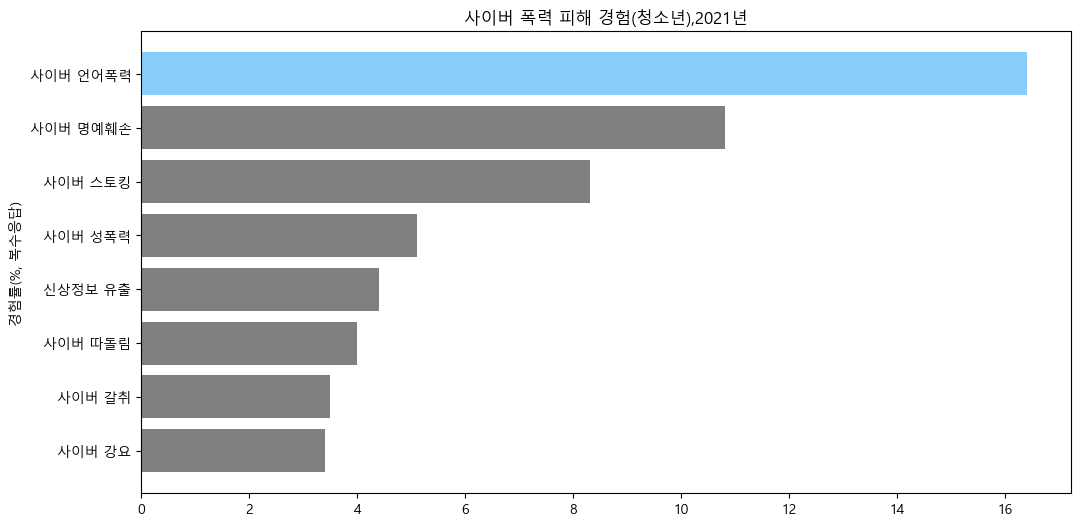

In [8]:
category_teen_labels = category_teen_sorted.iloc[0]
category_teen_values = category_teen_sorted.iloc[1]

# 바차트
plt.figure(figsize=(12,6))

category_colors = ['gray'] * (len(category_teen_values) - 1) + ['lightskyblue'] 

plt.barh(category_teen_labels, category_teen_values, color=category_colors)
plt.title('사이버 폭력 피해 경험(청소년),2021년')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

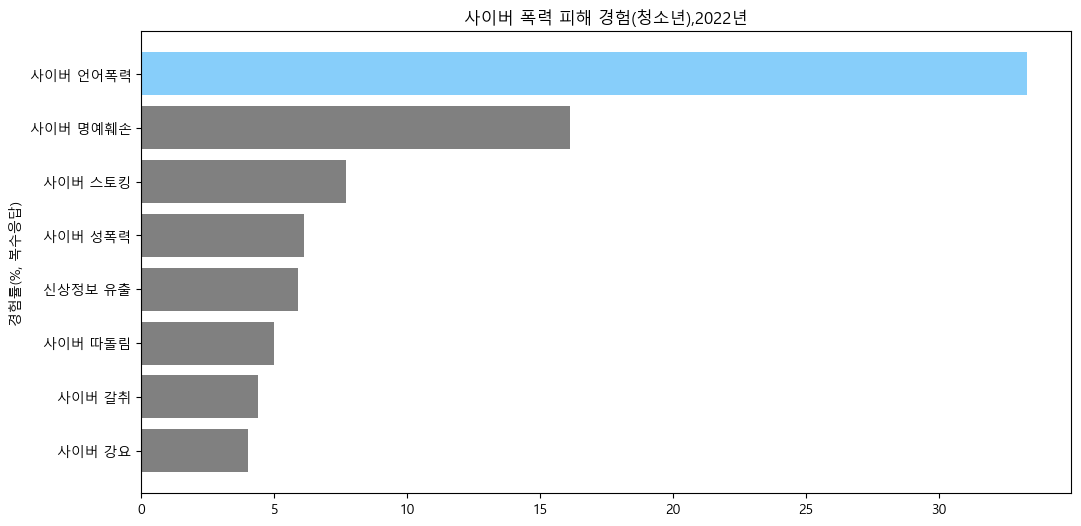

In [9]:
newcategory_teen_labels = newcategory_teen_sorted.iloc[0]
newcategory_teen_values = newcategory_teen_sorted.iloc[1]

# 바차트
plt.figure(figsize=(12,6))

plt.barh(newcategory_teen_labels, newcategory_teen_values, color=category_colors)
plt.title('사이버 폭력 피해 경험(청소년),2022년')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

In [10]:
filtered_category_teen = pd.DataFrame(category_teen.iloc[:2,2:])
filtered_category_teen.iloc[1] = filtered_category_teen.iloc[1].astype(float)
category_teen_sorted = filtered_category_teen.sort_values(by=1, axis=1, ascending=True)
filtered_newcategory_teen = pd.DataFrame(newcategory_teen.iloc[:2,2:])
filtered_newcategory_teen.iloc[1] = filtered_newcategory_teen.iloc[1].astype(float)
newcategory_teen_sorted = filtered_newcategory_teen.sort_values(by=1, axis=1, ascending=True)

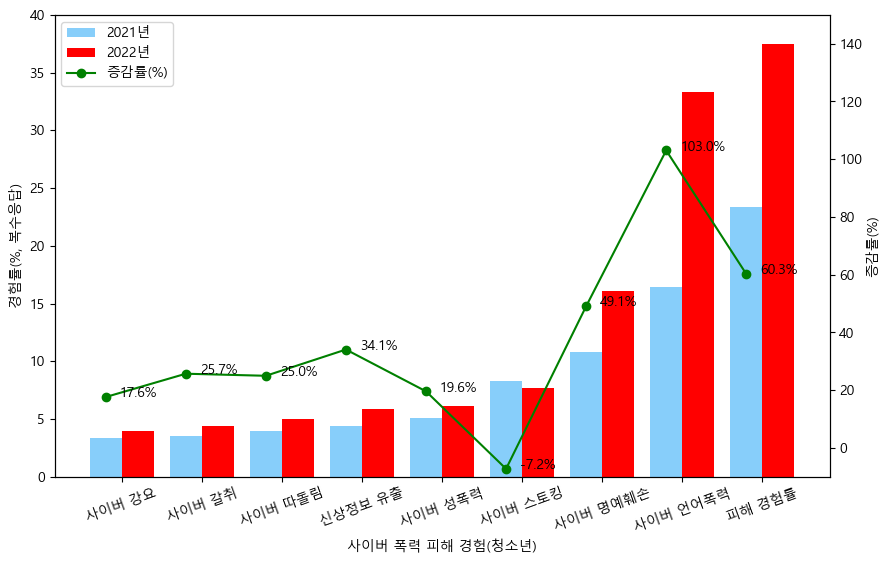

In [11]:
# 데이터
category_teen_labels = category_teen_sorted.iloc[0]
category_teen_values = category_teen_sorted.iloc[1]
newcategory_teen_labels = newcategory_teen_sorted.iloc[0]
newcategory_teen_values = newcategory_teen_sorted.iloc[1]

# 증감률 계산
rate_of_change = [(y2 - y1) / y1 * 100 for y1, y2 in zip(category_teen_values, newcategory_teen_values)]

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 그래프 그리기 (경험률)
bar_width = 0.4  # 바의 폭
bar_positions1 = np.arange(len(category_teen_labels))
bar_positions2 = bar_positions1 + bar_width

ax1.bar(bar_positions1, category_teen_values, width=bar_width, color='lightskyblue', label='2021년')
ax1.bar(bar_positions2, newcategory_teen_values, width=bar_width, color='red', label='2022년')

ax1.set_xlabel('사이버 폭력 피해 경험(청소년)')
ax1.set_xticks(bar_positions1 + bar_width / 2)
ax1.set_xticklabels(category_teen_labels, rotation=20)
ax1.set_ylabel('경험률(%, 복수응답)')

# 그래프 그리기 (증감률)
ax2 = ax1.twinx()  # 두 번째 y축 생성
ax2.plot(category_teen_labels, rate_of_change, marker='o', linestyle='-', color='green', label='증감률(%)')
ax2.set_ylabel('증감률(%)')

# y축 설정
ax1.set_ylim(0, 40)
ax2.set_ylim(-10, 150)

# 팝업에 값을 표시하는 함수 정의
def annotate_values(ax, x, y, text):
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.annotate(text[i], (xi, yi), xytext=(10, 0), textcoords='offset points')

# 값 팝업에 표시
annotate_values(ax2, category_teen_labels, rate_of_change, text=[f'{val:.1f}%' for val in rate_of_change])

# 범례 추가
handles, labels = ax1.get_legend_handles_labels()
handles.append(ax2.lines[0])
labels.append('증감률(%)')
ax1.legend(handles, labels, loc='upper left')

# 그래프 출력
plt.show()

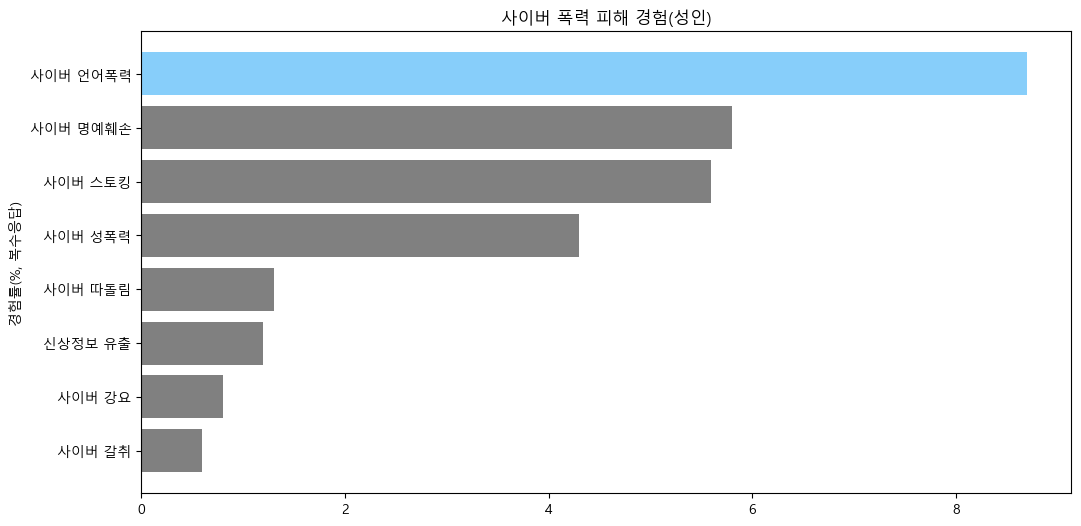

In [12]:
category_adult_labels = category_adult_sorted.iloc[0]
category_adult_values = category_adult_sorted.iloc[1]

# 바차트
plt.figure(figsize=(12,6))

plt.barh(category_adult_labels, category_adult_values, color = category_colors)
plt.title('사이버 폭력 피해 경험(성인)')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

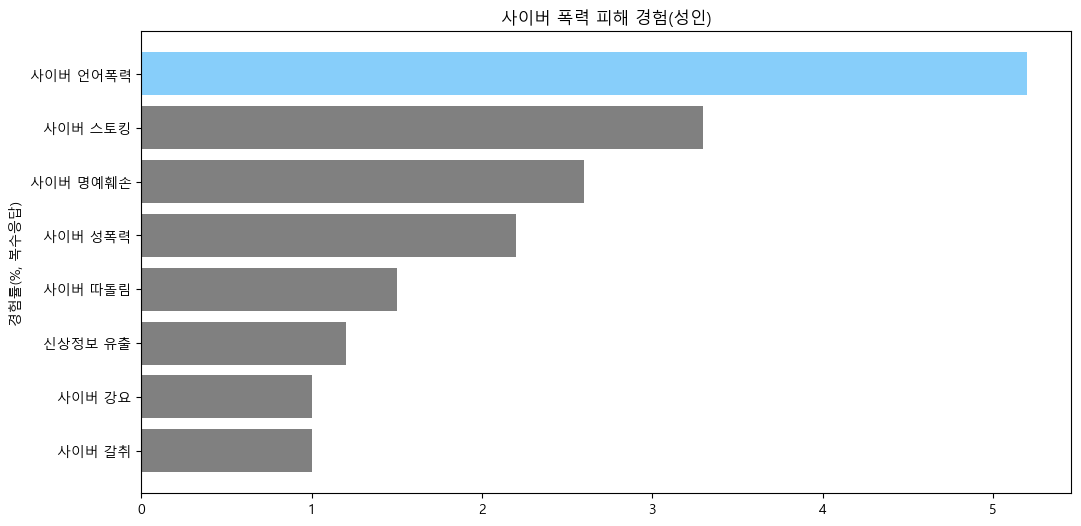

In [13]:
newcategory_adult_labels = newcategory_adult_sorted.iloc[0]
newcategory_adult_values = newcategory_adult_sorted.iloc[1]

# 바차트
plt.figure(figsize=(12,6))

plt.barh(newcategory_adult_labels, newcategory_adult_values, color = category_colors)
plt.title('사이버 폭력 피해 경험(성인)')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

In [14]:
experience_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
0,특성별(1),특성별(2),문자 및 인스턴트 메시지,SNS,온라인 게임,커뮤니티·동호회,개인 방송 서비스,메타버스,기타
1,전체,소계,38.4,21.2,47.5,4,4.9,2.6,1.4
2,성별,남학생,29.9,12.5,64.4,2.4,4.8,2.3,1.2
3,성별,여학생,50,33.1,24.2,6.2,5.1,3.1,1.7
4,학령별,초등학교,42.2,9.1,53.2,1.5,5.4,4.4,2.3


In [15]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_exp_teen = pd.DataFrame(experience_teen.iloc[:2,2:])
filtered_exp_teen.iloc[1] = filtered_exp_teen.iloc[1].astype(float)
exp_teen_sorted = filtered_exp_teen.sort_values(by=1, axis=1, ascending=True)
exp_teen_sorted

,2022.6,2022.5,2022.3,2022.4,2022.1,2022,2022.2
0,기타,메타버스,커뮤니티·동호회,개인 방송 서비스,SNS,문자 및 인스턴트 메시지,온라인 게임
1,1.4,2.6,4.0,4.9,21.2,38.4,47.5


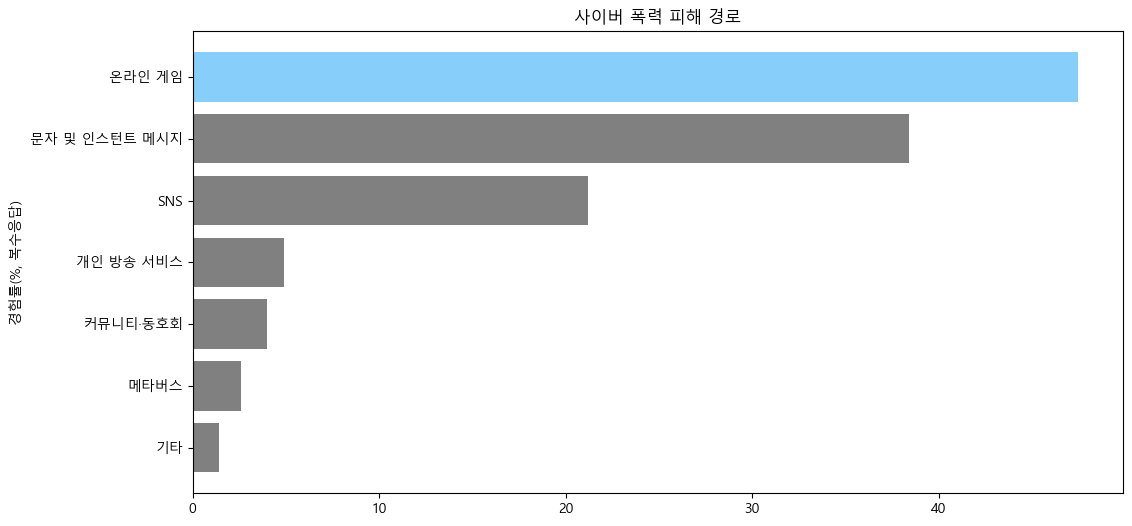

In [17]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

exp_teen_labels = exp_teen_sorted.iloc[0]
exp_teen_values = exp_teen_sorted.iloc[1]

# 바차트
plt.figure(figsize=(12,6))

exp_colors = ['gray'] * (len(exp_teen_values) - 1) + ['lightskyblue']

plt.barh(exp_teen_labels, exp_teen_values,color=exp_colors)
plt.title('사이버 폭력 피해 경로')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

# 사이버 폭력 피해 경험 후 취한 행동

In [18]:
react_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,특성별(1),특성별(2),가해자를 차단 하거나 나의 아이디나 이메일을 삭제 또는 변경하였다,가해자에게 직접 삭제하도록 하거나 사과를 요구하였다,가족 친구 선·후배 선생님등 주변에 알리거나 도움을 요청하였다,아무런 행동도 하지 않았다,해당 웹사이트나 상담센터 또는 경찰(학교폭력 신고센터 117등)에 신고했다,가해자에게 보복하거나 다른 사람을 대신 괴롭혔다
1,전체,소계,40.1,26.5,11.5,32.4,4.4,4.0
2,성별,남학생,35.6,21.6,7.9,38.0,5.1,6.4
3,성별,여학생,46.5,33.2,16.5,24.6,3.5,0.7
4,학령별,초등학교,41.8,29.8,14.1,29.5,3.9,2.2


In [19]:
react_adult.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,특성별(1),특성별(2),가해자를 차단하거나 나의 아이디나 이메일을 삭제 또는 변경하였다,아무런 행동도 하지 않았다,가해자에게 직접 삭제하도록 하거나 사과를 요구하였다,가족 친구선·후배 동료 등 주변에 알리거나 도움을 요청하였다,해당 웹사이트나 상담센터 또는 경찰에 신고했다,가해자에게 보복하거나 다른 사람을 대신 괴롭혔다
1,전체,소계,41.3,39.5,16.9,6.6,5.1,2.1
2,성별,남성,36.2,40.4,20.7,6.6,5.1,2.9
3,성별,여성,48.0,38.3,12.0,6.6,5.0,1.1
4,연령별,19~29세,45.7,38.6,13.6,5.6,5.7,2.1


In [20]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_react_teen = pd.DataFrame(react_teen.iloc[:2,2:])
filtered_react_teen.iloc[1] = filtered_react_teen.iloc[1].astype(float)
react_teen_sorted = filtered_react_teen.sort_values(by=1, axis=1, ascending=False)
react_teen_sorted

,2022,2022.3,2022.1,2022.2,2022.4,2022.5
0,가해자를 차단 하거나 나의 아이디나 이메일을 삭제 또는 변경하였다,아무런 행동도 하지 않았다,가해자에게 직접 삭제하도록 하거나 사과를 요구하였다,가족 친구 선·후배 선생님등 주변에 알리거나 도움을 요청하였다,해당 웹사이트나 상담센터 또는 경찰(학교폭력 신고센터 117등)에 신고했다,가해자에게 보복하거나 다른 사람을 대신 괴롭혔다
1,40.1,32.4,26.5,11.5,4.4,4.0


In [21]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_react_adult = pd.DataFrame(react_adult.iloc[:2,2:])
filtered_react_adult.iloc[1] = filtered_react_adult.iloc[1].astype(float)
react_adult_sorted = filtered_react_adult.sort_values(by=1, axis=1, ascending=True)
# 7번열 생성 (적극적 대응)
react_adult_sorted['7'] = react_adult_sorted[['2022.5', '2022.4', '2022.3', '2022.2']].sum(axis=1)
react_adult_sorted.at[0,'7'] = "적극적 대응"
# 8번열 생성 (소극적 대응)
react_adult_sorted['8'] = react_adult_sorted[['2022.1', '2022']].sum(axis=1)
react_adult_sorted.at[0,'8'] = "소극적 대응"
react_adult_sorted

,2022.5,2022.4,2022.3,2022.2,2022.1,2022,7,8
0,가해자에게 보복하거나 다른 사람을 대신 괴롭혔다,해당 웹사이트나 상담센터 또는 경찰에 신고했다,가족 친구선·후배 동료 등 주변에 알리거나 도움을 요청하였다,가해자에게 직접 삭제하도록 하거나 사과를 요구하였다,아무런 행동도 하지 않았다,가해자를 차단하거나 나의 아이디나 이메일을 삭제 또는 변경하였다,적극적 대응,소극적 대응
1,2.1,5.1,6.6,16.9,39.5,41.3,30.7,80.8


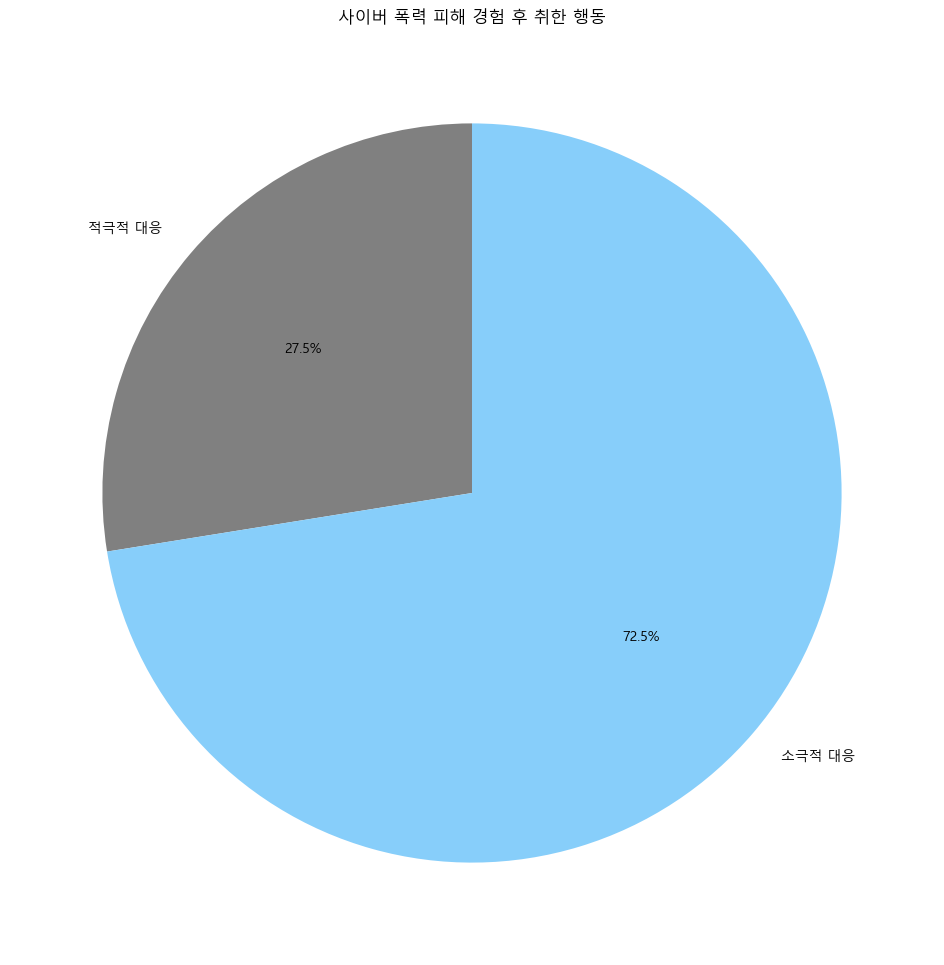

In [22]:
react_teen_labels = react_teen_sorted.iloc[0]
react_teen_values = react_teen_sorted.iloc[1]
react_adult_labels = react_adult_sorted.iloc[0,-2:]
react_adult_values = react_adult_sorted.iloc[1,-2:]
react_colors = ['gray','lightskyblue']

# 파이차트
plt.figure(figsize=(12, 12))

plt.pie(react_adult_values, labels=react_adult_labels, autopct='%1.1f%%',startangle=90,colors=react_colors)
plt.title('사이버 폭력 피해 경험 후 취한 행동')
plt.show()

# 사이버폭력 피해 경험 후 무대응 이유

In [26]:
reason_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,특성별(1),특성별(2),별일 아니라고 생각해서,나에게도 잘못이 있다고 생각해서,대응해도 피해가 멈춰질 것 같지 않아서,어디에 도움을 요청해야 할지 몰라서,나에게 피해를 준 상대방이 누구인지 몰라서,친구들로부터 더 심한 따돌림을 받게 될 것 같아서,나에게 피해를 준 상대방이 보복(복수) 할 것 같아서,친구를 잃을 것 같아서
1,전체,소계,72.5,19.5,7.1,3.0,5.2,4.5,3.9,5.5
2,성별,남학생,74.7,19.5,5.8,1.8,4.4,3.1,2.7,3.8
3,성별,여학생,68.0,19.7,10.0,5.4,6.9,7.5,6.4,9.1
4,학령별,초등학교,62.3,22.1,9.5,4.3,7.3,6.7,5.3,6.6


In [27]:
reason_adult.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,특성별(1),특성별(2),별일 아니라고 생각해서,나에게도 잘못이 있다고 생각해서,어디에 도움을 요청해야 할지 몰라서,가해자가 보복(복수)할 것 같아서,가해자가 누구인지 몰라서,대응해도 피해가 멈춰질 것 같지 않아서,친구를 잃을 것 같아서,친구들로부터 더 심한 따돌림을 받게 될 것 같아서
1,전체,소계,53.8,5.4,17.6,2.4,19.1,5.7,0.8,10.0
2,성별,남성,63.4,5.5,16.9,1.5,11.2,5.0,0.7,6.2
3,성별,여성,40.4,5.3,18.4,3.6,29.9,6.6,0.9,15.3
4,연령별,19~29세,54.0,7.2,19.3,2.3,19.2,1.0,1.0,9.5


In [28]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_reason_teen = pd.DataFrame(reason_teen.iloc[:2,2:])
filtered_reason_teen.iloc[1] = filtered_reason_teen.iloc[1].astype(float)
reason_teen_sorted = filtered_reason_teen.sort_values(by=1, axis=1, ascending=True)
reason_teen_sorted

,2022.3,2022.6,2022.5,2022.4,2022.7,2022.2,2022.1,2022
0,어디에 도움을 요청해야 할지 몰라서,나에게 피해를 준 상대방이 보복(복수) 할 것 같아서,친구들로부터 더 심한 따돌림을 받게 될 것 같아서,나에게 피해를 준 상대방이 누구인지 몰라서,친구를 잃을 것 같아서,대응해도 피해가 멈춰질 것 같지 않아서,나에게도 잘못이 있다고 생각해서,별일 아니라고 생각해서
1,3.0,3.9,4.5,5.2,5.5,7.1,19.5,72.5


In [29]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_reason_adult = pd.DataFrame(reason_adult.iloc[:2,2:])
filtered_reason_adult.iloc[1] = filtered_reason_adult.iloc[1].astype(float)
reason_adult_sorted = filtered_reason_adult.sort_values(by=1, axis=1, ascending=False)
reason_adult_sorted

,2022,2022.4,2022.2,2022.7,2022.5,2022.1,2022.3,2022.6
0,별일 아니라고 생각해서,가해자가 누구인지 몰라서,어디에 도움을 요청해야 할지 몰라서,친구들로부터 더 심한 따돌림을 받게 될 것 같아서,대응해도 피해가 멈춰질 것 같지 않아서,나에게도 잘못이 있다고 생각해서,가해자가 보복(복수)할 것 같아서,친구를 잃을 것 같아서
1,53.8,19.1,17.6,10.0,5.7,5.4,2.4,0.8


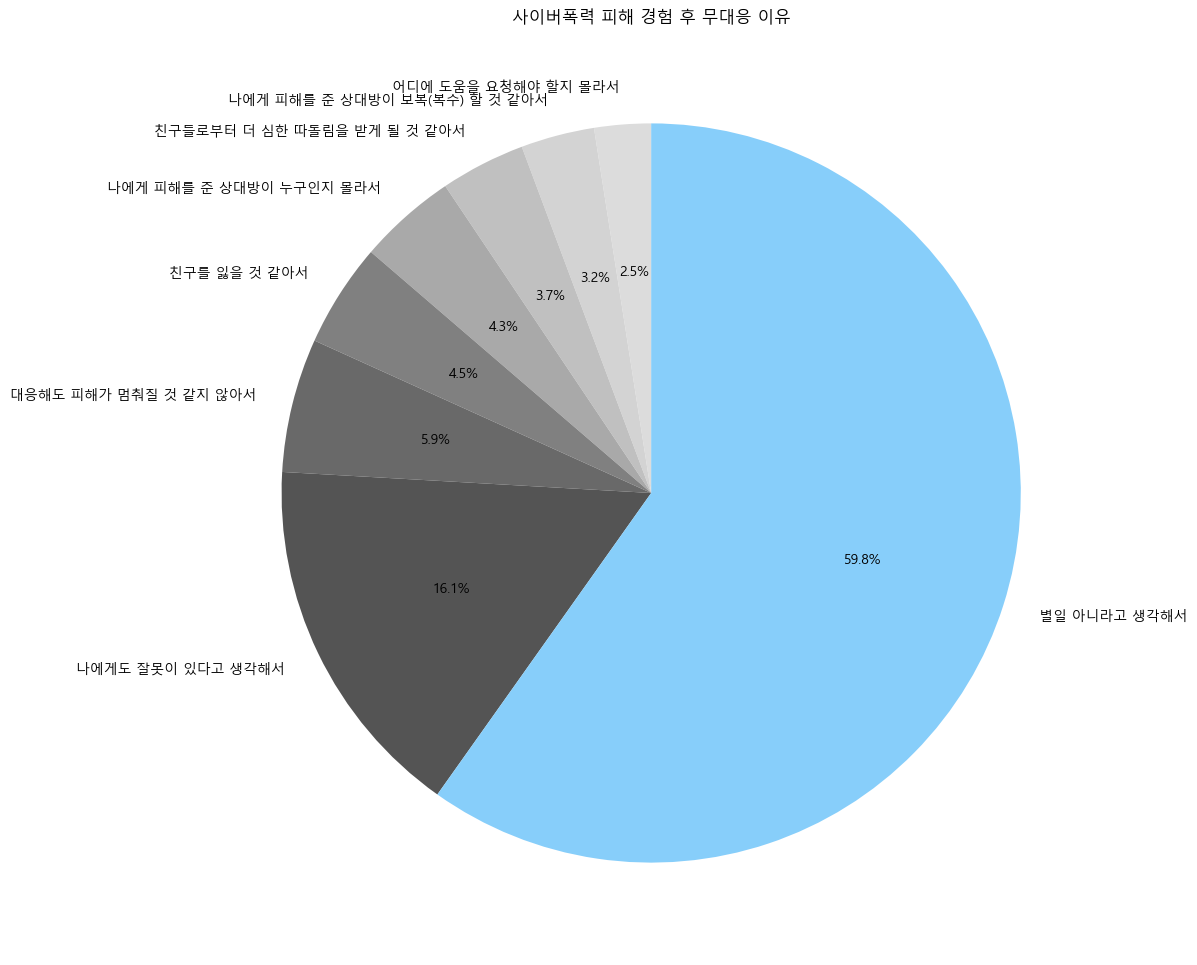

In [30]:
reason_teen_labels = reason_teen_sorted.iloc[0]
reason_teen_values = reason_teen_sorted.iloc[1]
reason_adult_labels = reason_adult_sorted.iloc[0]
reason_adult_values = reason_adult_sorted.iloc[1]
reason_colors = ['gainsboro','lightgray','silver','darkgray','gray','dimgray','#545454','lightskyblue']
# 파이차트
plt.figure(figsize=(12, 12))
plt.pie(reason_teen_values, labels=reason_teen_labels, autopct='%1.1f%%',startangle=90, colors=reason_colors)
plt.title('사이버폭력 피해 경험 후 무대응 이유')
plt.show()

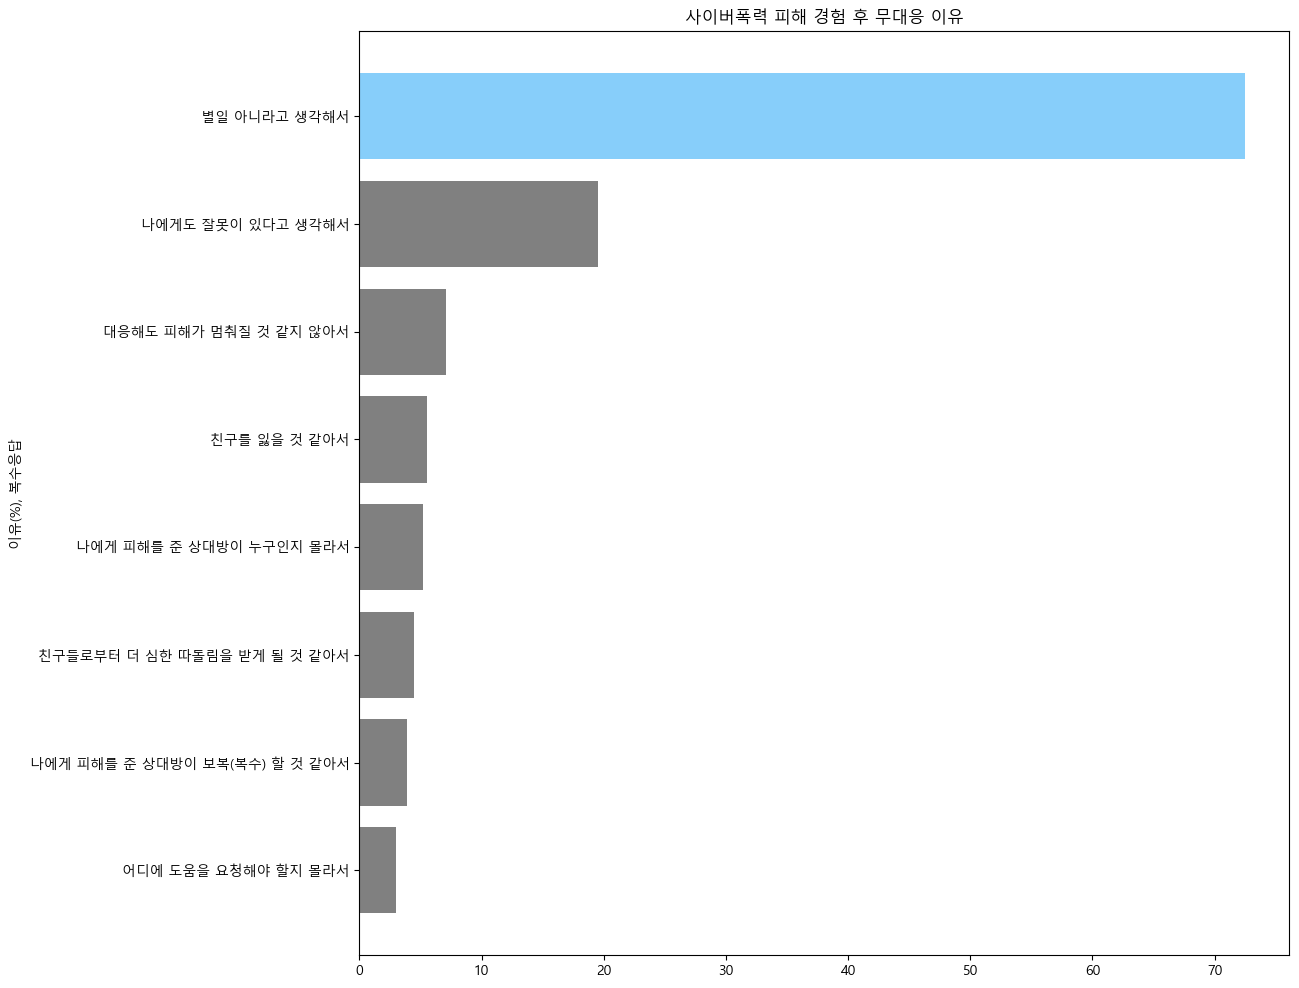

In [32]:
#바차트
plt.figure(figsize=(12, 12))
bar_reason_colors = ['gray'] * (len(reason_teen_values) - 1) + ['lightskyblue']
plt.barh(reason_teen_labels,reason_teen_values,color=bar_reason_colors)
plt.title('사이버폭력 피해 경험 후 무대응 이유')
plt.ylabel('이유(%), 복수응답')
plt.show()

In [33]:
offend_experience_teen = pd.read_csv("./violence_analysis/사이버폭력_가해_경험_경로_청소년.csv", encoding="cp949")
offend_reason_teen = pd.read_csv("./violence_analysis/사이버폭력_가해_동기_청소년.csv",encoding="cp949")
offend_reason_adult = pd.read_csv("./violence_analysis/사이버폭력_가해_동기_성인.csv",encoding="cp949")
punishment = pd.read_csv("./violence_analysis/사이버폭력_피해_발생_시_법적_처벌_인지_여부_성인.csv",encoding="cp949")

# 가해자의 입장에서
- 사이버 폭력 가해 경로 - 온라인 게임이 가장 높음
- 사이버 폭력 가해 동기 - 상대가 먼저 해서 보복으로, 상대방에게 화가나서, 재미나 장난으로 순 (청소년)
 - 재미나 장난으로, 상대가 먼저 해서 보복으로, 상대방에게 화가 나서 순(성인)
- 사이버 폭력 피해 발생시 법적 처벌 인지 여부 - 모른다가 50% 이상

##### 만약 사이버 언어폭력을 한 사람이 본인이 신고당했는지 여부를 확인할 수 있고, 이를 남들도 확인할 수 있다면
##### 정상적인 이용자들 사이에서 소외되고, 법적 처벌 여부도 확실하게 알게 된다면 온라인 상의 욕설 빈도를 완화할 수 있을것이다
## 사이버 폭력 가해 경로
- 문자 및 인스턴트 메시지 (카카오톡 라인 페이스북 메신저 텔레그램 등)
- SNS (페이스북 인스타그램 블로그 등)
- 커뮤니티·동호회 (네이버·다음카페 블라인드 에스크 등)
- 개인 방송 서비스(유튜브 아프리카TV 트위치 틱톡 등)
- 메타버스(제페토 이프렌드 등)

In [34]:
offend_experience_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6
0,특성별(1),특성별(2),문자 및 인스턴트 메시지,SNS,온라인 게임,커뮤니티·동호회,개인 방송 서비스,메타버스,기타
1,전체,소계,38.9,16.4,48.9,2.8,4.3,1.6,1.4
2,성별,남학생,30.9,11.2,62.7,2,5.2,1.9,1.4
3,성별,여학생,55,26.9,21,4.5,2.4,1,1.3
4,학령별,초등학교,44.6,8.6,48.9,1.5,3.9,2.1,2.8


In [35]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_offend_experience_teen = pd.DataFrame(offend_experience_teen.iloc[:2,2:])
filtered_offend_experience_teen.iloc[1] = filtered_offend_experience_teen.iloc[1].astype(float)
offend_experience_teen_sorted = filtered_offend_experience_teen.sort_values(by=1, axis=1, ascending=True)
offend_experience_teen_sorted

,2022.6,2022.5,2022.3,2022.4,2022.1,2022,2022.2
0,기타,메타버스,커뮤니티·동호회,개인 방송 서비스,SNS,문자 및 인스턴트 메시지,온라인 게임
1,1.4,1.6,2.8,4.3,16.4,38.9,48.9


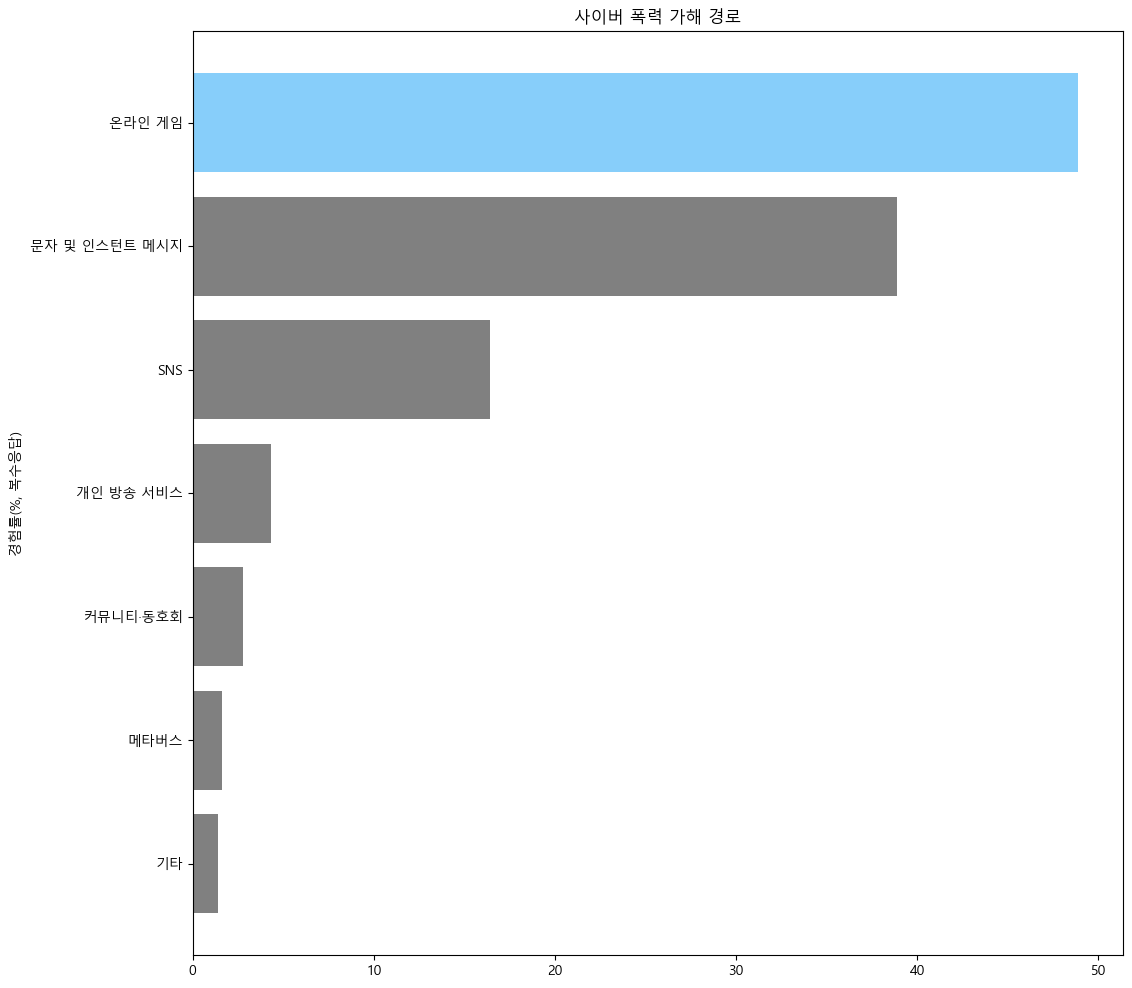

In [36]:
off_exp_teen_labels = offend_experience_teen_sorted.iloc[0]
off_exp_teen_values = offend_experience_teen_sorted.iloc[1]
plt.figure(figsize=(12,12))
# 파이차트

#plt.pie(off_exp_teen_values, labels=off_exp_teen_labels, autopct='%1.1f%%',startangle=90,colors=exp_colors)
#plt.title('사이버 폭력 가해 경로(파이차트)')
off_exp_colors = exp_colors = ['gray']* (len(off_exp_teen_values) - 1) + ['lightskyblue']
# 바차트

plt.barh(off_exp_teen_labels,off_exp_teen_values,color=exp_colors)
plt.title('사이버 폭력 가해 경로')
plt.ylabel('경험률(%, 복수응답)')
plt.show()

# 사이버 폭력 가해 동기

In [37]:
offend_reason_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,특성별(1),특성별(2),상대방이 먼저 그런 행동을 해서 보복하기 위해,재미나 장난으로 스트레스 해소를 위해,상대방이 싫어서 상대방에게 화가 나서,주변에서 함께 하므로 친구들과 어울리기 위해,내 의견과 달라서 상대방이 틀린 말을 해서,그냥 특별한 이유 없이
1,전체,소계,38.4,21.2,24.2,6.1,14.3,17.5
2,성별,남학생,39.1,22.4,22.9,5.3,14.6,17.8
3,성별,여학생,36.9,18.7,26.8,7.9,13.8,17.0
4,학령별,초등학교,38.5,18.0,20.8,4.9,11.7,22.0


In [38]:
offend_reason_adult.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,특성별(1),특성별(2),상대방이 싫어서 상대방에게 화가 나서,내 의견과 달라서 상대방이 틀린 말을 해서,상대방이 먼저 그런 행동을 해서 보복하기 위해,재미나 장난으로 스트레스 해소를 위해,주변에서 함께 하므로친구나 동료들과 어울리기 위해,그냥 특별한 이유 없이
1,전체,소계,13.0,7.7,31.9,39.2,11.2,9.6
2,성별,남성,12.6,6.5,37.3,38.5,11.8,7.3
3,성별,여성,13.7,9.5,23.7,40.3,10.3,13.0
4,연령별,19~29세,13.8,6.8,34.4,41.8,9.4,10.7


In [39]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_offend_reason_teen = pd.DataFrame(offend_reason_teen.iloc[:2,2:])
filtered_offend_reason_teen.iloc[1] = filtered_offend_reason_teen.iloc[1].astype(float)
offend_reason_teen_sorted = filtered_offend_reason_teen.sort_values(by=1, axis=1, ascending=True)
offend_reason_teen_sorted['7'] = offend_reason_teen_sorted[['2022.5', '2022.3', '2022.1']].sum(axis=1)
offend_reason_teen_sorted.at[0,'7'] = "별다른 이유 없음"
# 8번열 생성 (소극적 대응)
offend_reason_teen_sorted['8'] = offend_reason_teen_sorted[['2022', '2022.2', '2022.4']].sum(axis=1)
offend_reason_teen_sorted.at[0,'8'] = "상대방에 대한 적개심"
offend_reason_teen_sorted

,2022.3,2022.4,2022.5,2022.1,2022.2,2022,7,8
0,주변에서 함께 하므로 친구들과 어울리기 위해,내 의견과 달라서 상대방이 틀린 말을 해서,그냥 특별한 이유 없이,재미나 장난으로 스트레스 해소를 위해,상대방이 싫어서 상대방에게 화가 나서,상대방이 먼저 그런 행동을 해서 보복하기 위해,별다른 이유 없음,상대방에 대한 적개심
1,6.1,14.3,17.5,21.2,24.2,38.4,44.8,76.9


In [40]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_offend_reason_adult = pd.DataFrame(offend_reason_adult.iloc[:2,2:])
filtered_offend_reason_adult.iloc[1] = filtered_offend_reason_adult.iloc[1].astype(float)
offend_reason_adult_sorted = filtered_offend_reason_adult.sort_values(by=1, axis=1, ascending=True)
offend_reason_adult_sorted['7'] = offend_reason_adult_sorted[['2022.5', '2022.4', '2022.3']].sum(axis=1)
offend_reason_adult_sorted.at[0,'7'] = "별다른 이유 없음"
# 8번열 생성 (소극적 대응)
offend_reason_adult_sorted['8'] = offend_reason_adult_sorted[['2022.1', '2022', '2022.2']].sum(axis=1)
offend_reason_adult_sorted.at[0,'8'] = "상대방에 대한 적개심"
offend_reason_adult_sorted

,2022.1,2022.5,2022.4,2022,2022.2,2022.3,7,8
0,내 의견과 달라서 상대방이 틀린 말을 해서,그냥 특별한 이유 없이,주변에서 함께 하므로친구나 동료들과 어울리기 위해,상대방이 싫어서 상대방에게 화가 나서,상대방이 먼저 그런 행동을 해서 보복하기 위해,재미나 장난으로 스트레스 해소를 위해,별다른 이유 없음,상대방에 대한 적개심
1,7.7,9.6,11.2,13.0,31.9,39.2,60.0,52.6


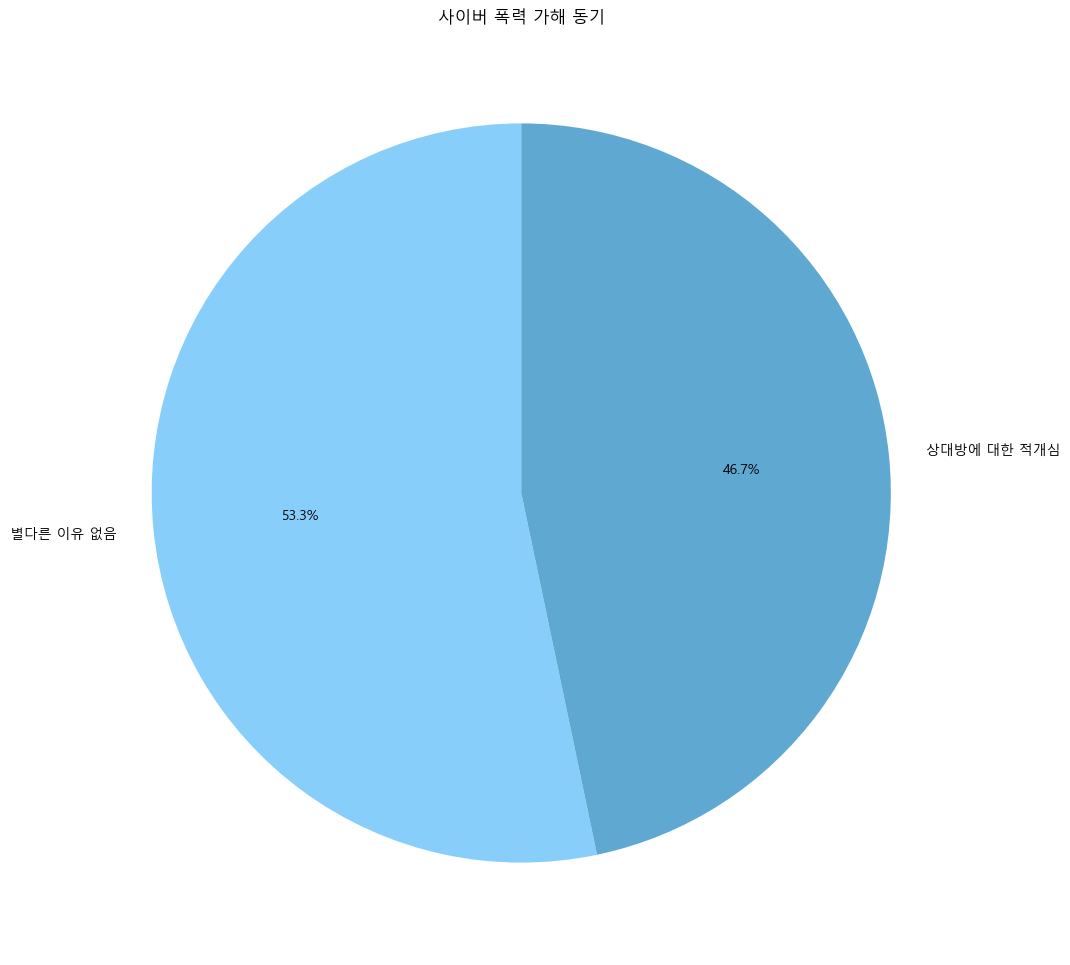

In [41]:
off_reason_teen_labels = offend_reason_teen_sorted.iloc[0,-2:]
off_reason_teen_values = offend_reason_teen_sorted.iloc[1,-2:]
off_reason_adult_labels = offend_reason_adult_sorted.iloc[0,-2:]
off_reason_adult_values = offend_reason_adult_sorted.iloc[1,-2:]
off_reason_colors = ['lightskyblue','#5fa8d2']
# 파이차트
plt.figure(figsize=(12, 12))
plt.pie(off_reason_adult_values, labels=off_reason_adult_labels, autopct='%1.1f%%',startangle=90,colors=off_reason_colors)
plt.title('사이버 폭력 가해 동기')
plt.show()

# 사이버폭력_피해_발생_시_법적_처벌_인지_여부

In [43]:
punishment.head()

,특성별(1),특성별(2),2022,2022.1,2022.2
0,특성별(1),특성별(2),들어본 적 있다,들어본 적 있고 내용도 알고 있다,잘 모른다
1,전체,소계,30.6,16.6,52.8
2,성별,남성,32.4,18.2,49.4
3,성별,여성,28.8,14.9,56.4
4,연령별,19~29세,33.9,21.9,44.2


In [44]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_punishment = pd.DataFrame(punishment.iloc[:2,2:])
filtered_punishment.iloc[1] = filtered_punishment.iloc[1].astype(float)
punishment_sorted = filtered_punishment.sort_values(by=1, axis=1, ascending=True)
punishment_sorted

,2022.1,2022,2022.2
0,들어본 적 있고 내용도 알고 있다,들어본 적 있다,잘 모른다
1,16.6,30.6,52.8


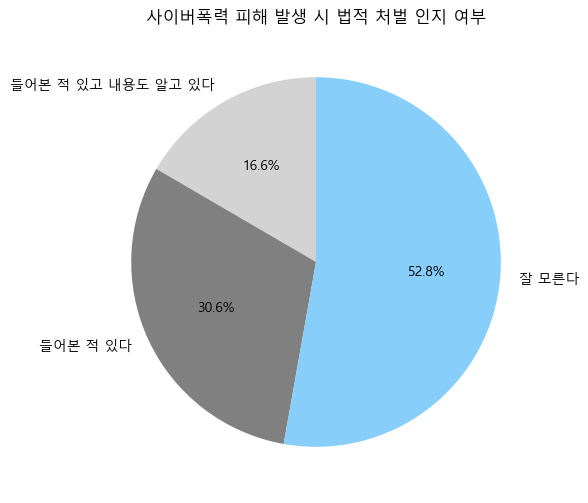

In [45]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

punishment_labels = punishment_sorted.iloc[0]
punishment_values = punishment_sorted.iloc[1]

color = ['lightgray','gray','lightskyblue']

# 파이차트
plt.figure(figsize=(12,6))
plt.pie(punishment_values, labels=punishment_labels, autopct='%1.1f%%',startangle=90,colors=color)
plt.title('사이버폭력 피해 발생 시 법적 처벌 인지 여부')
plt.show()
# #바차트
# axs[1].bar(punishment_labels,punishment_values)
# axs[1].set_title('사이버폭력 피해 발생 시 법적 처벌 인지 여부(바 차트)')
# axs[1].set_ylabel('인지 여부(%)')
# axs[1].set_xticks(range(len(punishment_labels)))
# axs[1].set_xticklabels(punishment_labels, rotation=45)

# 모두 사이버 언어폭력이 문제가 되는건 인지하고 있다.

In [46]:
recognize_teen = pd.read_csv("./violence_analysis/사이버폭력_용인태도__사이버_언어폭력_청소년.csv", encoding="cp949")
recognize_adult = pd.read_csv("./violence_analysis/사이버폭력_유형별_용인태도__사이버_언어폭력_성인.csv", encoding="cp949")

In [47]:
recognize_teen.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3
0,특성별(1),특성별(2),전혀 문제가 되지 않는다,문제가 되지 않는다,문제가 된다,매우 문제가 된다
1,전체,소계,2.4,2.8,38.8,55.9
2,성별,남학생,3.2,4.0,42.7,50.1
3,성별,여학생,1.6,1.6,34.7,62.1
4,학령별,초등학교,2.9,3.4,32.0,61.6


In [48]:
recognize_adult.head()

,특성별(1),특성별(2),2022,2022.1,2022.2,2022.3
0,특성별(1),특성별(2),전혀 문제가 되지 않는다,문제가 되지 않는다,문제가 된다,매우 문제가 된다
1,전체,소계,0.5,3.9,43.9,51.7
2,성별,남성,0.3,4.3,46.7,48.7
3,성별,여성,0.6,3.4,41.1,54.9
4,연령별,19~29세,0.6,4.8,43.7,50.9


In [49]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬 및 정리
filtered_recognize_teen = pd.DataFrame(recognize_teen.iloc[:2,2:])
filtered_recognize_teen.iloc[1] = filtered_recognize_teen.iloc[1].astype(float)
recognize_teen_sorted = filtered_recognize_teen.sort_values(by=1, axis=1, ascending=False)
recognize_teen_sorted['2022.2'][1] = recognize_teen_sorted['2022.2'][1]+recognize_teen_sorted['2022.3'][1]
recognize_teen_sorted['2022.1'][1] = recognize_teen_sorted['2022.1'][1]+recognize_teen_sorted['2022'][1]
recognize_teen_sorted = recognize_teen_sorted.drop(['2022.3','2022'], axis=1)
recognize_teen_sorted

,2022.2,2022.1
0,문제가 된다,문제가 되지 않는다
1,94.7,5.2


In [50]:
# 필요한 값만 남기고 자료형 변경후 내림차순 정렬
filtered_recognize_adult = pd.DataFrame(recognize_adult.iloc[:2,2:])
filtered_recognize_adult.iloc[1] = filtered_recognize_adult.iloc[1].astype(float)
recognize_adult_sorted = filtered_recognize_adult.sort_values(by=1, axis=1, ascending=True)
recognize_adult_sorted['2022.2'][1] = recognize_adult_sorted['2022.2'][1]+recognize_adult_sorted['2022.3'][1]
recognize_adult_sorted['2022.1'][1] = recognize_adult_sorted['2022.1'][1]+recognize_adult_sorted['2022'][1]
recognize_adult_sorted = recognize_adult_sorted.drop(['2022.3','2022'], axis=1)
recognize_adult_sorted

,2022.1,2022.2
0,문제가 되지 않는다,문제가 된다
1,4.4,95.6


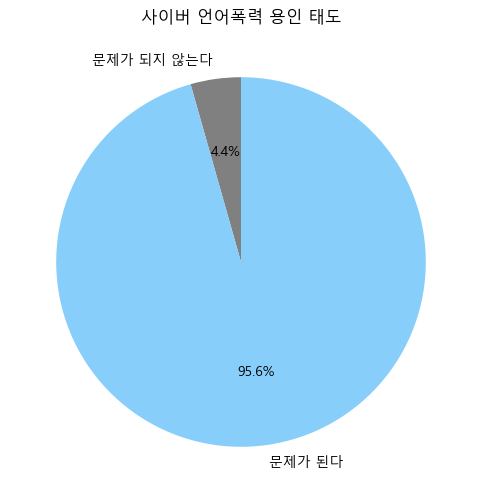

In [51]:
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

recognize_adult_labels = recognize_adult_sorted.iloc[0]
recognize_adult_values = recognize_adult_sorted.iloc[1]

colors = ['gray','lightskyblue']

# 파이차트
plt.figure(figsize=(12,6))
plt.pie(recognize_adult_values, labels=recognize_adult_labels, autopct='%1.1f%%',startangle=90, colors=colors)
plt.title('사이버 언어폭력 용인 태도')
plt.show()
# #바차트
# axs[1].bar(recognize_teen_labels,recognize_teen_values)
# axs[1].set_title('사이버 언어폭력 용인 태도(바 차트)')
# axs[1].set_ylabel('인지 여부(%)')
# axs[1].set_xticks(range(len(recognize_teen_labels)))
# axs[1].set_xticklabels(recognize_teen_labels, rotation=45)